In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
dataset = '../PRODIGY_ML_02/Dataset/Mall_Customers.csv'
customers = pd.read_csv(dataset,usecols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
customers

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

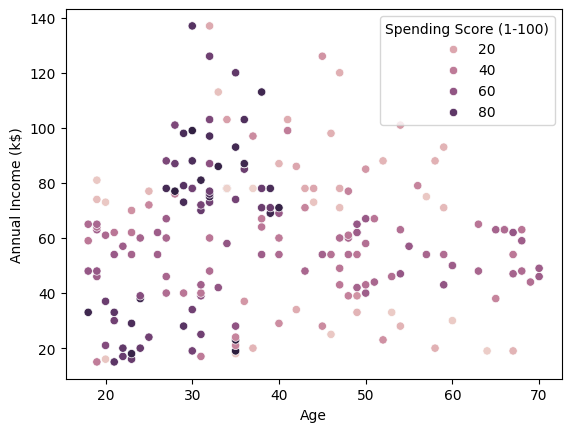

In [4]:
sns.scatterplot(data = customers, x = 'Age', y = 'Annual Income (k$)', hue = 'Spending Score (1-100)')

In [5]:
customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
scaler = StandardScaler()
customers[['Age', 'Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
customers

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [7]:
def kMeansClsutering(data, k):
    nClusters = []
    inertias = []
    for i in range(1,k):
        kmeans = KMeans(n_clusters=i, n_init=4)
        kmeans.fit(data)
        nClusters.append(i)
        inertias.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.plot(nClusters, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('The SSE of the intertia')
    plt.grid(True)
    plt.show()

600.0
389.3861889564372
295.2122461555489


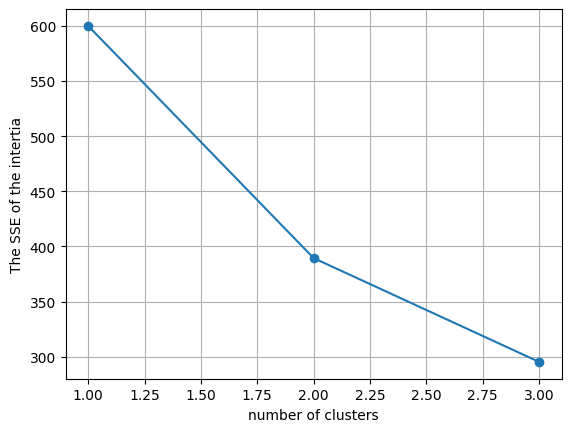

In [8]:
kMeansClsutering(customers,4)

In [9]:
kmeans = KMeans(n_clusters = 2, random_state=8, n_init='auto')
kmeans.fit(customers[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=2, random_state=8)

In [10]:
customers['clusters'] = kmeans.labels_
customers

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,0


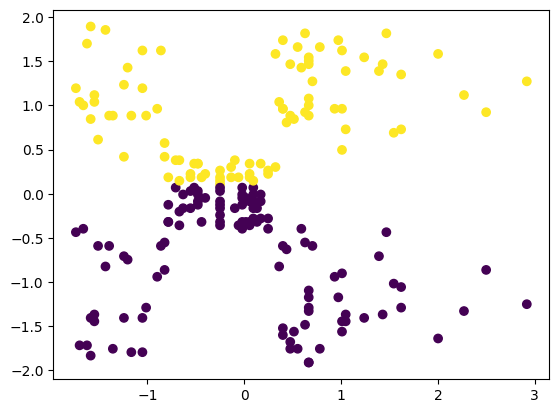

In [11]:
plt.scatter(x=customers["Annual Income (k$)"], y=customers["Spending Score (1-100)"], c=customers["clusters"])
plt.show()

In [12]:
for i in range(1,3):
    kmeans=KMeans(n_clusters=i, random_state=4, n_init='auto')
    kmeans.fit(customers[['Annual Income (k$)', 'Spending Score (1-100)']])
    customers[f'clusters_{i}'] = kmeans.labels_

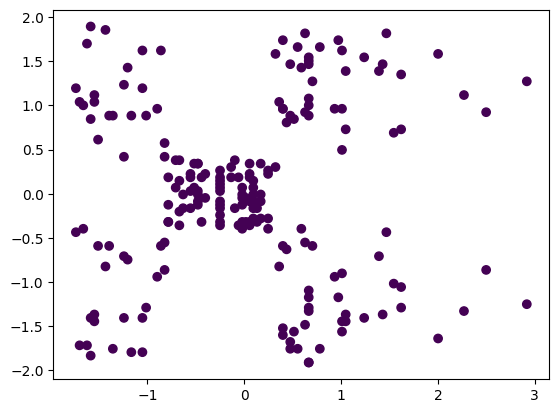

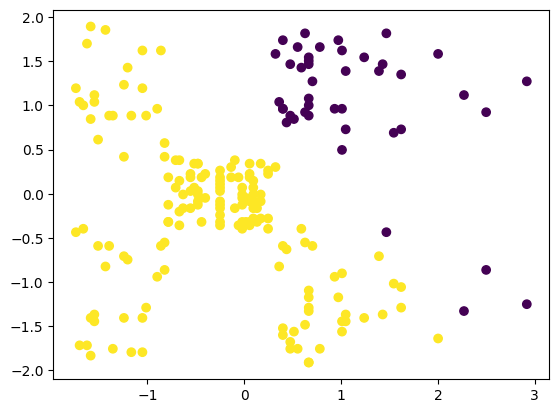

In [13]:
for i in range(1,3):
    plt.scatter(x=customers["Annual Income (k$)"], y=customers["Spending Score (1-100)"], c=customers[f"clusters_{i}"])
    # ax.set_title(f"K-Clusters={i}")
    plt.show()

In [14]:
customers

,Age,Annual Income (k$),Spending Score (1-100),clusters,clusters_1,clusters_2
0,-1.424569,-1.738999,-0.434801,0,0,1
1,-1.281035,-1.738999,1.195704,1,0,1
2,-1.352802,-1.700830,-1.715913,0,0,1
3,-1.137502,-1.700830,1.040418,1,0,1
4,-0.563369,-1.662660,-0.395980,0,0,1
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1,0,0
196,0.441365,2.497807,-0.861839,0,0,0
197,-0.491602,2.497807,0.923953,1,0,0
198,-0.491602,2.917671,-1.250054,0,0,0
